In [1]:
import fasttext
import pandas as pd
import numpy as np
import tensorflow_hub as hub
import umap
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

/Users/harinisuresh/.virtualenvs/test_cases/lib/python3.7/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
def getModelPredsHelper(allExamples, model):
    exampleList = [x.replace('\n', ' ') for x in allExamples]
    preds = model.predict(exampleList)
    preds_int = np.array([1 if 'positive' in p[0] else 0 for p in preds[0]])
    preds_prob = np.array([p[0] for p in preds[1]])
    probs = np.array([1 - p if preds_int[i] == 0 else p for (i,p) in enumerate(preds_prob)])
    probs = [np.round(p,3) for p in probs]
    return probs

In [3]:
%matplotlib inline

In [30]:
all_comments = pd.read_csv('../data/reddit/all_comments_df')

In [31]:
all_comments = all_comments[['body', 'subreddit', 'moderated']]

In [32]:
sub = "funny"
subreddit_comments = all_comments[all_comments.subreddit == sub].body.values
subreddit_labels = all_comments[all_comments.subreddit == sub].moderated.values

In [33]:
embed = hub.load("/Users/harinisuresh/Dev/tf_hub/universal-sentence-encoder_4/")

In [34]:
vecs = np.array(embed(subreddit_comments))

In [36]:
umap_reducer = umap.UMAP()
umap_embeddings = umap_reducer.fit_transform(vecs)

In [37]:
pca_reducer = PCA(n_components=2)
pca_embeddings = pca_reducer.fit_transform(vecs)

In [38]:
tsne_reducer = TSNE(n_components=2)
tsne_embeddings = tsne_reducer.fit_transform(vecs)

In [39]:
model = fasttext.load_model("../models/reddit/%s_model.bin" % sub)
preds = np.array(getModelPredsHelper(comments, model))

In [56]:
df = pd.DataFrame({
    'comment_id': range(len(subreddit_comments)),
    'comment': subreddit_comments,
    'label': subreddit_labels,
    'pred': preds,
    'umap_x': umap_embeddings[:,0],
    'umap_y': umap_embeddings[:,1],
    'pca_x': pca_embeddings[:,0],
    'pca_y': pca_embeddings[:,1],
    'tsne_x': tsne_embeddings[:,0],
    'tsne_y': tsne_embeddings[:,1]
})

In [57]:
df.to_csv('../data/reddit/funny/projection_df', index=False)

In [4]:
ls ../react-app/api/data/reddit/funny/projection_df

__pycache__/      node_modules/     react-app/
documentation/    notebooks/        requirements.txt


In [7]:
xs = pd.read_csv('../react-app/api/data/reddit/funny/projection_df')['umap_x']
ys = pd.read_csv('../react-app/api/data/reddit/funny/projection_df')['umap_y']


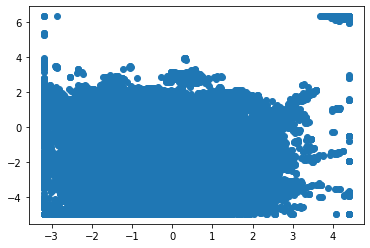

In [17]:
plt.scatter(np.clip(xs, xs.quantile(0.05), xs.quantile(0.95)), 
            np.clip(ys, ys.quantile(0.05), ys.quantile(0.95)))


In [16]:
np.clip(xs, xs.quantile(0.05), xs.quantile(0.95))

0       -3.045098
1        1.575318
2       -0.131999
3        0.491807
4       -2.683635
           ...   
32738    1.146495
32739    0.889189
32740   -0.402147
32741   -1.510421
32742   -1.226840
Name: umap_x, Length: 32743, dtype: float64

In [20]:
embs = np.load('../react-app/api/data/reddit/funny/embs.npy')
np.savetxt('../react-app/api/data/reddit/funny/embs.tsv', embs, delimiter="\t")

In [22]:
comments = pd.read_csv('../react-app/api/data/reddit/funny/projection_df').comment

In [27]:
comments.to_csv('../react-app/api/data/reddit/funny/comments.tsv',index=False,header=False)

In [46]:
stopwords = {'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 
u"she's", 'her', 'hers', 'herself', 'it', u"it's", 'its', 'itself', 'they', 'them', 
'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
'that', u"that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
'while', 'of', 'at', 'i', 'i\'m', 'i\'ll', 'i\'d', 'my', 'me', 'so', 'to', 'such', 'in'}

In [31]:
sample = np.array(comments[1:50])

In [55]:
from collections import Counter

In [54]:
# split() returns list of all the words in the string
split_it = " ".join(sample).split()
split = list(filter(lambda x: x.lower() not in stopwords, split_it))

In [56]:
Counter = Counter(split)

In [57]:
most_occur = Counter.most_common(4)

In [58]:
most_occur

[('you', 13), ('black', 9), ('for', 8), ('people', 4)]

comment_id                                            comment  label  \
0               0  You can tell this is fake because it shows a b...      1   
1               1                           The fat lady is singing.      1   
2               2  Good thing volks never break down. XD Shitty k...      1   
3               3                I'm dreaming of a bright christmas.      1   
4               4  I'd be sad too if my mom got knocked up in hig...      1   
...           ...                                                ...    ...   
32738       32738  I feel pretty stupid right now.  I'm deleting ...      0   
32739       32739                           That's amazing thank you      0   
32740       32740                                   love the honesty      0   
32741       32741  At least an effort was made to obey the rules....      0   
32742       32742  Why?\n\nYou're young and can keep up with them...      0   

        pred    umap_x     umap_y     pca_x     pca_y     tsne_x     tsne_y  
0      0.988 -1.342861   8.528571 -0.143643  0.085669  55.842620  13.659914  
1      0.997  3.544253   7.443844 -0.008068  0.004616   9.396464  18.984072  
2      0.990  0.164953   8.376058 -0.106509  0.059272  26.409739 -35.093937  
3      0.995  0.210002   7.736676  0.071565  0.069409 -11.741515  32.897507  
4      0.961  3.808352   7.543086 -0.131564  0.022218  13.745846  -3.450827  
...      ...       ...        ...       ...       ...        ...        ...  
32738  0.141  3.087954  12.431319 -0.075867  0.301665  10.959727  30.994236  
32739  0.011  5.503755  12.743122  0.098362  0.168887 -28.783457  42.777153  
32740  0.228  5.483923  11.861365  0.167125  0.284558 -25.468122  20.661785  
32741  0.031 -0.051434   9.491453 -0.097116 -0.142629  46.181120 -12.363643  
32742  0.187  1.074965   9.390912 -0.081217 -0.292853  26.715643  -8.299600  

[32743 rows x 10 columns]

In [6]:
df = pd.read_csv('../react-app/api/data/reddit/funny/projection_df')
embs = np.load('../react-app/api/data/reddit/funny/embs.npy')

In [9]:
comments = df.comment

In [28]:
index_to_remove = []

In [29]:
index_to_remove.extend(df[df['comment'].str.contains("If you feel this was done in error, or would like further clarification, please don't hesitate to")].index)

In [31]:
index_to_remove.extend(df[df['comment'].str.contains("https|\.com")].index)

In [35]:
select_df = df.loc[~df.index.isin(index_to_remove)]

In [42]:
np.savetxt('../react-app/api/data/reddit/funny/embs_big.tsv', embs, delimiter="\t")
df.loc[:, df.columns != 'Unnamed: 0'].to_csv('../react-app/api/data/reddit/funny/projection_df_big')

In [43]:
select_idx = select_df.sample(15000).index

In [47]:
select_df.loc[select_idx, select_df.columns != 'Unnamed: 0'].to_csv('../react-app/api/data/reddit/funny/projection_df')


comment_id                                            comment  label  \
17481       17481                                         NOT DENNIS      0   
22180       22180           And you can't forget the yearly lottery.      0   
23794       23794  What the fuck do you find funny about US Soldi...      0   
30732       30732                                      No buttholes?      0   
21306       21306                          You're not a fan of tran?      0   
...           ...                                                ...    ...   
21692       21692                                    _JESUS CRUSHED_      0   
19995       19995  I'm thinking of this was photoshopped he'd hav...      0   
21380       21380  ha, that little girl lost. Also pretty bad par...      0   
24860       24860                                               3:35      0   
12314       12314                   The thumb ring is where it's at.      1   

        pred    umap_x     umap_y     pca_x     pca_y     tsne_x     tsne_y  
17481 -0.000  5.955781  10.077752  0.263306 -0.000767 -46.833664 -13.680651  
22180  0.000  4.006462   9.339295 -0.072458 -0.022167 -24.412146  11.929041  
23794  0.770 -0.438669   9.566496 -0.135840 -0.135680  45.665253  -7.823002  
30732  0.000  3.522943   7.491852  0.216213  0.035443 -53.049053  -5.007526  
21306  0.001 -0.762542   6.882498  0.018382  0.228419  39.369835  31.414524  
...      ...       ...        ...       ...       ...        ...        ...  
21692  0.000  5.849733  10.897588  0.200822  0.097303 -37.492653  18.776415  
19995  0.044  2.295178   7.617372 -0.159080  0.000891   8.126185  -8.059162  
21380  0.102  1.123104   9.632294 -0.153480 -0.140276  31.446486 -12.664404  
24860  0.000  7.820551   8.920550  0.245135 -0.275904 -54.672330  31.846422  
12314  0.968  1.926958   8.174859 -0.009845  0.036122  -5.093649 -36.595050  

[15000 rows x 10 columns]

In [51]:
np.savetxt('../react-app/api/data/reddit/funny/embs_big.tsv', embs[select_idx], delimiter="\t")